In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1'
from keras.models import load_model
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, recall_score, precision_score
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
from eval_model import calcul_score, calcul_curve, show_error

Using TensorFlow backend.


In [2]:
test_set = h5py.File("data/images_v3_seq20/images_v3_TEST.h5",'r')
x = test_set["images"]
y = test_set["labels"]
y2 = 1-test_set["labels"][0:]

### VGG16 - ImageNet

In [3]:
model2 = load_model("models/VGG16_v3/fseq_20_imgnt/model_epoch30.hdf5")
prediction2 = model2.predict(x, verbose=1)

8660/8660 [==============================] - 40s 5ms/step


--------------------------------------
best result for max FRR  0.029 , threeshold =  0.92
 FRR :  0.027692307692307693
 FAR :  0.167986798679868
--------------------------------------
accuracy :  0.874133949191686


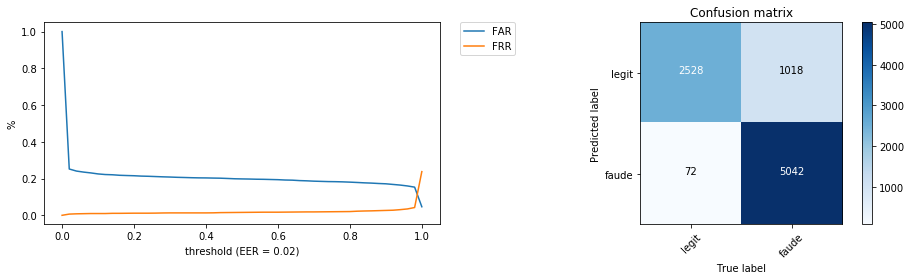

In [4]:
calcul_curve(prediction2, y)

### VGG19 - ImageNet

In [5]:
model3 = load_model("models/VGG19_v3/fseq_20_imgnt/model_epoch30.hdf5")
prediction3 = model3.predict(x, verbose=1)

8660/8660 [==============================] - 36s 4ms/step


--------------------------------------
best result for max FRR  0.029 , threeshold =  0.96
 FRR :  0.02423076923076923
 FAR :  0.14455445544554454
--------------------------------------
accuracy :  0.8915704387990762


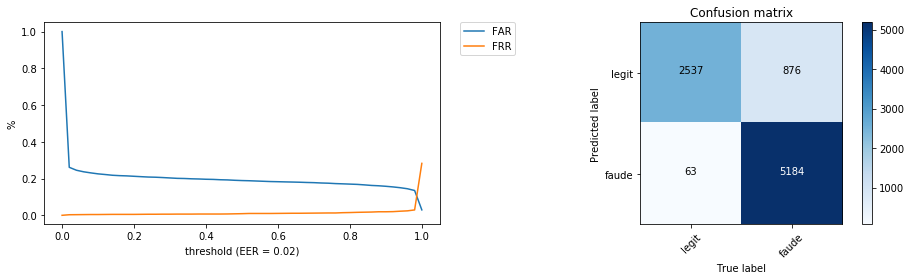

In [6]:
calcul_curve(prediction3, y)

### VGG19 - 1024 imgn

In [7]:
model6 = load_model("models/VGG19_v3/fseq_20_1024_imgnt/model_epoch27.hdf5")
prediction6 = model6.predict(x, verbose=1)

8660/8660 [==============================] - 37s 4ms/step


--------------------------------------
best result for max FRR  0.029 , threeshold =  0.84
 FRR :  0.027692307692307693
 FAR :  0.10693069306930693
--------------------------------------
accuracy :  0.9168591224018475


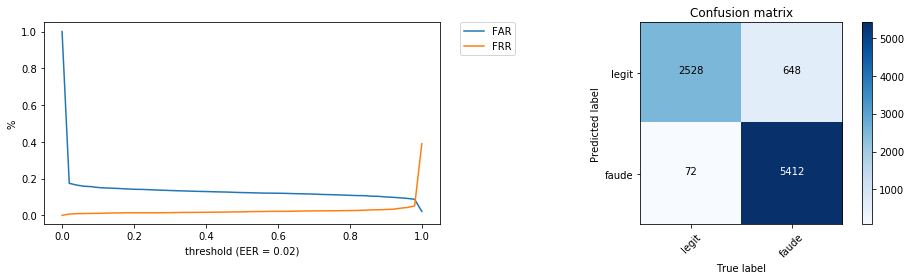

In [8]:
calcul_curve(prediction6, y)

### VGG16 notop nofreeze

In [97]:
model7 = load_model("models/VGG16_v3/notop_nofreeze/model_epoch30.hdf5")
prediction7 = model7.predict(x, verbose=1)

8660/8660 [==============================] - 34s 4ms/step


--------------------------------------
best result for max FRR  0.029 , threeshold =  0.0
 FRR :  1.0
 FAR :  0.0
--------------------------------------
accuracy :  0.3002309468822171


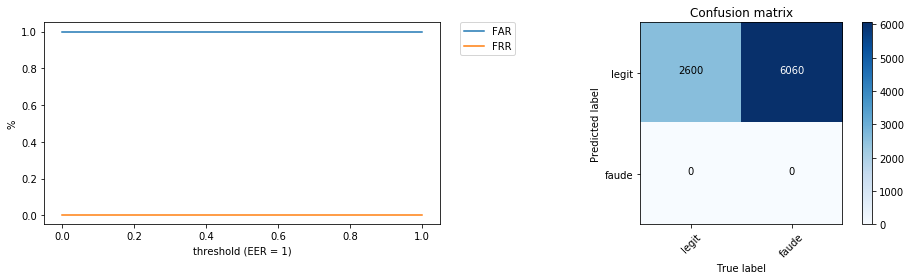

In [99]:
calcul_curve(1-prediction7, y)

### VGG19 - newsplit_1024_dp

In [7]:
model8 = load_model("models/VGG19_v3/newsplit_1024_dp/model_epoch30.hdf5")
prediction8 = model8.predict(x, verbose=1)

8660/8660 [==============================] - 37s 4ms/step


--------------------------------------
best result for max FRR  0.029 , threeshold =  0.06
 FRR :  0.028076923076923076
 FAR :  0.15676567656765678
--------------------------------------
accuracy :  0.8818706697459584


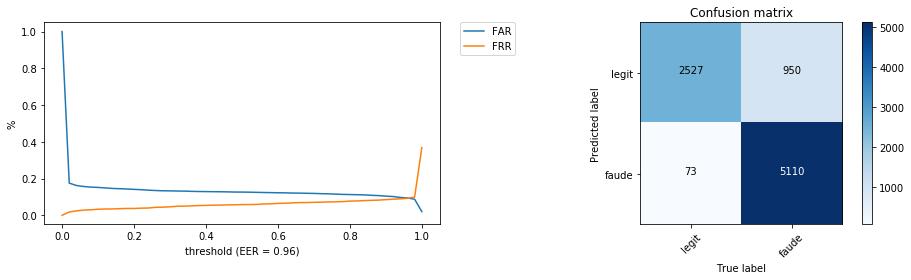

In [8]:
calcul_curve(prediction8, y)

# No campagne

#### VGG19 - dp_1024_olddb

In [6]:
model9 = load_model("models/VGG19_v3/dp_1024_olddb/model_epoch37.hdf5")
prediction9 = model9.predict(x, verbose=1)

8660/8660 [==============================] - 64s 7ms/step


--------------------------------------
best result for max FRR  0.029 , threeshold =  0.78
 FRR :  0.028846153846153848
 FAR :  0.13432343234323432
--------------------------------------
accuracy :  0.8973441108545035


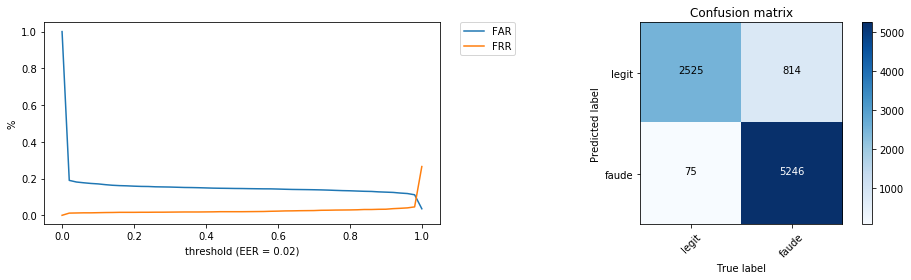

In [50]:
calcul_curve(1-prediction9, y)

#### VGG19 - gap_binary

In [54]:
model10 = load_model("models/VGG19_v3/gap_binary/model_epoch37.hdf5")
prediction10 = model10.predict(x, verbose=1)

8660/8660 [==============================] - 37s 4ms/step


--------------------------------------
best result for max FRR  0.029 , threeshold =  0.38
 FRR :  0.028846153846153848
 FAR :  0.14603960396039603
--------------------------------------
accuracy :  0.8891454965357968


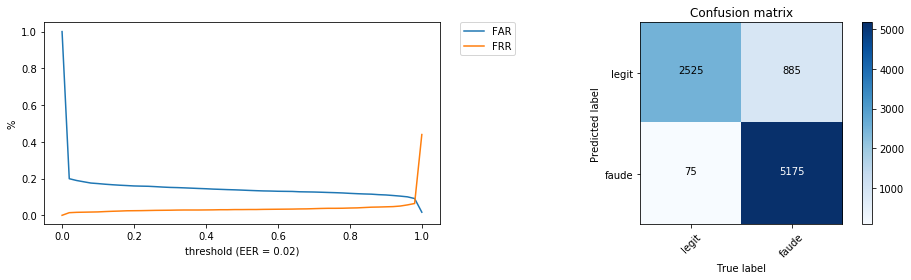

In [55]:
calcul_curve(prediction10, y)

#### VGG19 - dp_1024_binary

In [58]:
model11 = load_model("models/VGG19_v3/dp_1024_binary/model_epoch29.hdf5")
prediction11 = model11.predict(x, verbose=1)

8660/8660 [==============================] - 37s 4ms/step


--------------------------------------
best result for max FRR  0.029 , threeshold =  0.5
 FRR :  0.028846153846153848
 FAR :  0.1546204620462046
--------------------------------------
accuracy :  0.8831408775981524


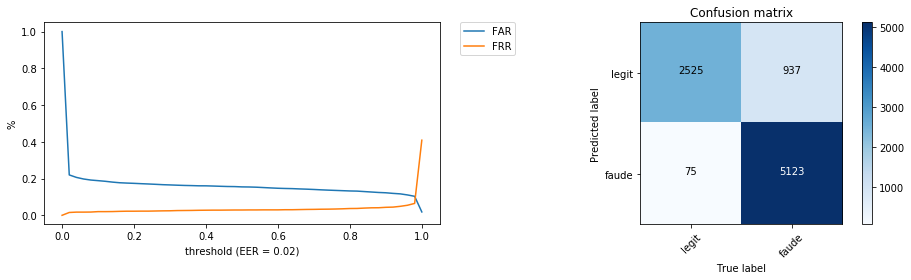

In [60]:
calcul_curve(prediction11, y)

#### VGG19 - dp_1024_preprocessing

In [90]:
model12 = load_model("models/VGG19_v3/dp_1024_preprocessing/model_epoch23.hdf5")
prediction12 = model12.predict(x, verbose=1)

8660/8660 [==============================] - 36s 4ms/step


--------------------------------------
best result for max FRR  0.029 , threeshold =  0.24
 FRR :  0.02846153846153846
 FAR :  0.14521452145214522
--------------------------------------
accuracy :  0.8898383371824481


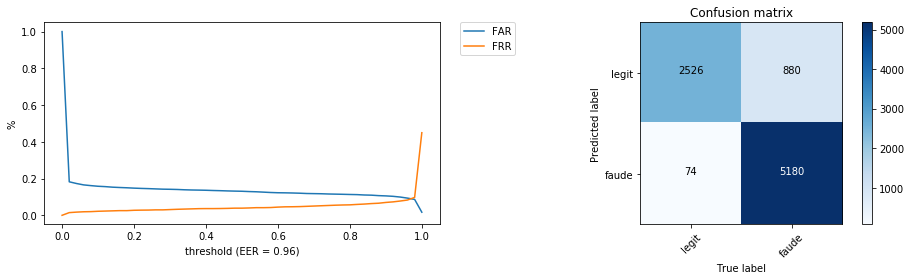

In [101]:
calcul_curve(1-prediction12, y)

#### VGG19 - gap_fc2_dp_binary

In [8]:
model13 = load_model("models/VGG19_v3/gap_fc2_dp_binary/model_epoch25.hdf5")
prediction13 = model13.predict(x, verbose=1)

8660/8660 [==============================] - 37s 4ms/step


--------------------------------------
best result for max FRR  0.029 , threeshold =  0.12
 FRR :  0.027692307692307693
 FAR :  0.14092409240924092
--------------------------------------
accuracy :  0.8930715935334873


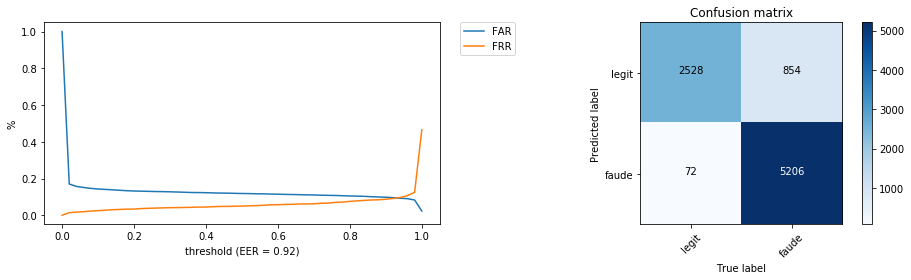

In [9]:
calcul_curve(prediction13, y)

In [32]:
def calcul_curve(prediction_model, y_true, max_frr = 0.029):
    list_FAR = []
    list_FRR = []
    t = np.arange(0.0, 1.01, 0.02)
    EER = 1
    best_frr = [0.0,1.0,0.0]
    for x in t:
        y_pred = (prediction_model[:,0] < x).astype(np.int)
        cm = confusion_matrix(y_true, y_pred).T
        TP, FP, FN, TN = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
        FRR = FN / float(FN + TP)
        FAR = FP / float(TN + FP)
        list_FAR.append(FAR)
        list_FRR.append(FRR)
        EER = x if FAR - FRR < EER and FAR - FRR > 0 else EER

    for x, v in enumerate(list_FRR):
        if v < max_frr and v > 0:
            best_frr = [t[x], v, list_FAR[x]]

    print("--------------------------------------")
    print("best result for max FRR ", max_frr,", threeshold = ", best_frr[0])
    print(" FRR : ", best_frr[1])
    print(" FAR : ", best_frr[2])
    print("--------------------------------------")
    
    plt.figure(figsize=(13, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(t, list_FAR, label="FAR") # plotting t, a separately 
    plt.plot(t, list_FRR,  label="FRR") # plotting t, b separately
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('%')
    plt.xlabel('threshold (EER = '+str(EER)+')')
    
    plt.subplot(1, 2, 2)
    calcul_score(prediction_model, y_true, best_frr[0], False)
    
    plt.tight_layout()

### Explore erreur

In [3]:
# show_error(prediction6, y, x, "FP", 0.1)

In [4]:
# show_error(prediction6, y, x, "FN", 0.9)

In [22]:
images_label = pd.read_csv("data/images_v3_10/images_v3_TEST.csv")

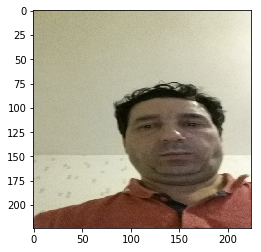

In [28]:
plt.imshow(x[583])

In [29]:
images_label.loc[583]["path"]

'extracted\\2016_SLAM_video_OSN\\000013_001_001_000_004/file_1460656820065768_720_1280_720_6_0.000000.png'

In [61]:
TR = h5py.File("data/images_v3_seq20/images_v3_VAL.h5",'r')
xt = TR["images"]
yt = TR["labels"]

In [78]:
import cv2

In [85]:
img = cv2.imread("/home/stagiaire/SSD/yannis/images_v3_seq20/0_000044_02048f419_012_0.png")